In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import xlrd
from xlwt import Workbook, Formula
import pandas

# Preprocessing of X only experiments

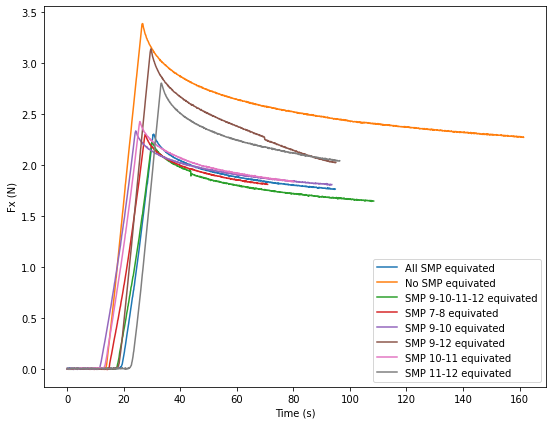

In [114]:
dffXALL = pd.read_csv('X12800EQUIVALLEQUIV.2.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) #X All equiv
dffXNO =  pd.read_csv('X12800NOEQUIV.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) #X No equiv
dffX9101112 = pd.read_csv('X12800EQUIV9-10-11-12.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) #X equiv 9-10-11-12
dffX78 = pd.read_csv('X12800Equiv7-8.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time'])
dffX910 = pd.read_csv('X12800Equiv9-10.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time'])
dffX912 = pd.read_csv('X12800EQUIV9-12.2.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time'])
dffX1011 = pd.read_csv('X12800Equiv10-11.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time'])
dffX1112 = pd.read_csv('X12800Equiv11-12.2.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time'])






d = [dffXALL,dffXNO,dffX9101112,dffX78,dffX910,dffX912,dffX1011,dffX1112]
for df in d: 
    df['Time'] = df['Time']-df['Time'][0]
    df['Time'] = df['Time']/1000
    df['Fx'] = -1*df['Fx']
    df['Fx'] = df['Fx'] - df['Fx'][0]
    df['Fy'] = df['Fy'] - df['Fy'][0]
    df['Fz'] = df['Fz'] - df['Fz'][0]
    df['Tx'] = df['Tx'] - df['Tx'][0]
    df['Ty'] = df['Ty'] - df['Ty'][0]
    df['Tz'] = df['Tz'] - df['Tz'][0]

fig = plt.figure(1, figsize = (9,7))
ax = fig.add_subplot(111)
plt.plot(dffXALL['Time'],dffXALL['Fx'], label = 'All SMP equivated')
plt.plot(dffXNO['Time'],dffXNO['Fx'], label = 'No SMP equivated')
plt.plot(dffX9101112['Time'],dffX9101112['Fx'], label = 'SMP 9-10-11-12 equivated')
plt.plot(dffX78['Time'],dffX78['Fx'], label = 'SMP 7-8 equivated')
plt.plot(dffX910['Time'],dffX910['Fx'], label = 'SMP 9-10 equivated')
plt.plot(dffX912['Time'],dffX912['Fx'], label = 'SMP 9-12 equivated')
plt.plot(dffX1011['Time'],dffX1011['Fx'], label = 'SMP 10-11 equivated')
plt.plot(dffX1112['Time'],dffX1112['Fx'], label = 'SMP 11-12 equivated')
#lgd = ax.legend(loc=9, bbox_to_anchor=(1.2,0.75))
plt.xlabel('Time (s)')
plt.ylabel('Fx (N)')
plt.legend(loc='best')
plt.show()

In [115]:
#adding Forces and SMP excitations
#length of the string pulling (267-138)
tmp = np.linspace(0,12800,129)
columns = ['X','Y','Z','SMP7','SMP8','SMP9','SMP10','SMP11','SMP12']
d2 = list()
for df in d: 
    i = int(df[['Fx']].idxmax())   #finding the max value of 'Fx' corresponding to the end of the pulling
    dtmp = pd.DataFrame(np.zeros((len(df),len(columns))),columns = columns)
    dtmp['X'][i-129:i] = tmp
    dtmp['X'][i:]=12800
    df = pd.concat([df,dtmp], axis = 1)
    d2.append(df)
"""    
    for i in range(len(df)): #Start everything when the peak occur
        if df['Fx'][i+10]-df['Fx'][i] > 0.12:
            tmp3 = i
            print(i)
            break
    df = df[i:]
    df['Time'] = df['Time'] - df['Time'][i]
"""
    
    

dffXALL,dffXNO,dffX9101112,dffX78,dffX910,dffX912,dffX1011,dffX1112 = d2[:]

#CASE BY CASE SMP 

#DFXNO ==> No SMP

#DFXALL
tmp = np.ones(len(dffXALL))
for i in columns[3:]:
    dffXALL[i] = tmp
#DFX9101112
tmp = np.ones(len(dffX9101112))
for i in columns[5:9]:
    dffX9101112[i] = tmp
    
#DFX78
tmp = np.ones(len(dffX78))
dffX78['SMP7'] = tmp
dffX78['SMP8'] = tmp

#DFX910
tmp = np.ones(len(dffX910))
dffX910['SMP9']=tmp
dffX910['SMP10']=tmp
#DFX912
tmp = np.ones(len(dffX912))
dffX912['SMP9']=tmp
dffX912['SMP12']=tmp
#DFX1011
tmp = np.ones(len(dffX1011))
dffX1011['SMP10']=tmp
dffX1011['SMP11']=tmp
#DFX1011
tmp = np.ones(len(dffX1112))
dffX1112['SMP11']=tmp
dffX1112['SMP12']=tmp

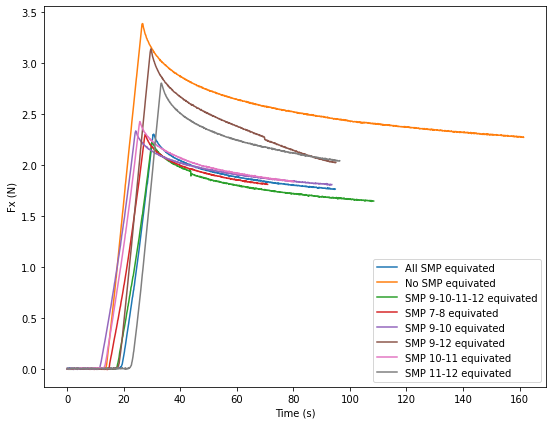

In [116]:
fig = plt.figure(1, figsize = (9,7))
ax = fig.add_subplot(111)
plt.plot(dffXALL['Time'],dffXALL['Fx'], label = 'All SMP equivated')
plt.plot(dffXNO['Time'],dffXNO['Fx'], label = 'No SMP equivated')
plt.plot(dffX9101112['Time'],dffX9101112['Fx'], label = 'SMP 9-10-11-12 equivated')
plt.plot(dffX78['Time'],dffX78['Fx'], label = 'SMP 7-8 equivated')
plt.plot(dffX910['Time'],dffX910['Fx'], label = 'SMP 9-10 equivated')
plt.plot(dffX912['Time'],dffX912['Fx'], label = 'SMP 9-12 equivated')
plt.plot(dffX1011['Time'],dffX1011['Fx'], label = 'SMP 10-11 equivated')
plt.plot(dffX1112['Time'],dffX1112['Fx'], label = 'SMP 11-12 equivated')
#lgd = ax.legend(loc=9, bbox_to_anchor=(1.2,0.75))
plt.xlabel('Time (s)')
plt.ylabel('Fx (N)')
plt.legend(loc='best')
plt.show()

In [117]:
ALLXtmp = [dffXALL,dffXNO,dffX9101112,dffX78,dffX910,dffX912,dffX1011,dffX1112]
XALL = pd.concat(ALLXtmp)


In [118]:
dffX9101112.head()

,Fx,Fy,Fz,Tx,Ty,Tz,Time,X,Y,Z,SMP7,SMP8,SMP9,SMP10,SMP11,SMP12
0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,-0.005,0.005,0.005,0.017,0.015,0.019,0.1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,-0.005,0.003,-0.002,-0.011,-0.010,0.009,0.2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,-0.002,0.002,0.005,-0.033,0.028,0.019,0.3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,-0.005,0.003,0.002,-0.011,0.007,0.037,0.4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


# Preprocessing on XY60

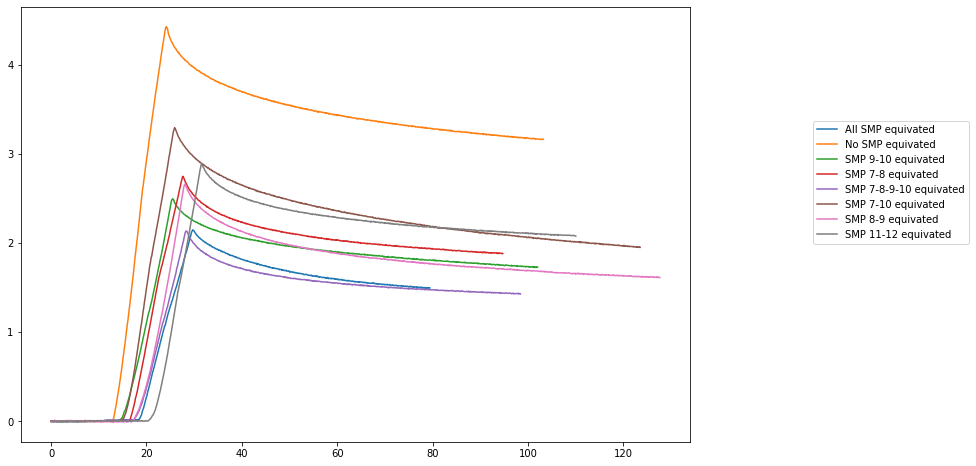

In [119]:
dff60ALL = pd.read_csv('XY60-12800-ALLEQUIV.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) #XY66 All equiv
dff60NO =  pd.read_csv('XY60-12800-NO.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) #XY66 No equiv
dff60_910 = pd.read_csv('XY60-12800-9-10.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) #XY66 equiv 9-10
dff60_78 = pd.read_csv('XY60-12800-7-8.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) #XY66 equiv 7-8
dff60_78910 = pd.read_csv('XY60-12800-7-8-9-10.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) #XY66 equiv 78910
dff60_710 = pd.read_csv('XY60-12800-7-10.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) #XY66 equiv 7-10
dff60_89 = pd.read_csv('XY60-12800-8-9.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) #XY66 equiv 7-10
dff60_1112 = pd.read_csv('XY60-12800-11-12.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) #XY66 equiv 11_12

d = [dff60ALL,dff60NO,dff60_910,dff60_78, dff60_78910, dff60_710,dff60_89,dff60_1112]
for df in d: 
    df['Time'] = df['Time']-df['Time'][0]
    df['Time'] = df['Time']/1000
    df['Fx'] = -1*df['Fx']
    df['Fx'] = df['Fx'] - df['Fx'][0]
    df['Fy'] = df['Fy'] - df['Fy'][0]
    df['Fz'] = df['Fz'] - df['Fz'][0]
    df['Tx'] = df['Tx'] - df['Tx'][0]
    df['Ty'] = df['Ty'] - df['Ty'][0]
    df['Tz'] = df['Tz'] - df['Tz'][0]
    #df['F'] = np.sqrt(df['Fx']**2+df['Fy']**2)
    
fig = plt.figure(2, figsize = (12,8))
ax = fig.add_subplot(111)
plt.plot(dff60ALL['Time'],dff60ALL['Fy'], label = 'All SMP equivated')
plt.plot(dff60NO['Time'],dff60NO['Fy'], label = 'No SMP equivated')
plt.plot(dff60_910['Time'],dff60_910['Fy'], label = 'SMP 9-10 equivated')
plt.plot(dff60_78['Time'],dff60_78['Fy'], label = 'SMP 7-8 equivated')
plt.plot(dff60_78910['Time'],dff60_78910['Fy'], label = 'SMP 7-8-9-10 equivated')
plt.plot(dff60_710['Time'],dff60_710['Fy'], label = 'SMP 7-10 equivated')
plt.plot(dff60_89['Time'],dff60_89['Fy'], label = 'SMP 8-9 equivated')
plt.plot(dff60_1112['Time'],dff60_1112['Fy'], label = 'SMP 11-12 equivated')
#plt.plot(dffY1112['Time'],dffY1112['Fy'], label = 'EVAL')
lgd = ax.legend(loc=9, bbox_to_anchor=(1.3,0.75))
plt.show()

In [59]:
#X :249-184 = 65
#Y :297-184 = 113

In [120]:
#adding Forces and SMP excitations
#length of the string pulling (267-138)
tmp = np.linspace(0,11085,112)
tmp2 = np.linspace(0,6400,65)
columns = ['X','Y','Z','SMP7','SMP8','SMP9','SMP10','SMP11','SMP12']
d2 = list()
for df in d: 
    i = int(df[['Fx']].idxmax())   #finding the max value of 'Fx' corresponding to the end of the pulling
    j = int(df[['Fy']].idxmax())
    dtmp = pd.DataFrame(np.zeros((len(df),len(columns))),columns = columns)
    dtmp['X'][j-112:j-112+65] = tmp2
    dtmp['X'][j-112+65:]=6400
    dtmp['Y'][j-112:j] = tmp
    dtmp['Y'][j:]=11085     
    df = pd.concat([df,dtmp], axis = 1)
    d2.append(df)
"""
    for i in range(len(df)): #Start everything when the peak occur
        if df['Fx'][i+10]-df['Fx'][i] > 0.12:
            tmp3 = i
            print(i)
            break
    df = df[tmp3:]
    df['Time'] = df['Time'] - df['Time'][i] """
    
    

dff60ALL,dff60NO,dff60_910,dff60_78, dff60_78910, dff60_710,dff60_89,dff60_1112 = d2[:]

#CASE BY CASE SMP 

#DFXNO ==> No SMP

#DFXALL
tmp = np.ones(len(dff60ALL))
for i in columns[3:]:
    dff60ALL[i] = tmp
#DFX9101112
tmp = np.ones(len(dff60_78910))
for i in columns[3:7]:
    dff60_78910[i] = tmp
    
#DFX78
tmp = np.ones(len(dff60_78))
dff60_78['SMP7'] = tmp
dff60_78['SMP8'] = tmp

#DFX910
tmp = np.ones(len(dff60_910))
dff60_910['SMP9']=tmp
dff60_910['SMP10']=tmp
#DFX912
tmp = np.ones(len(dff60_710))
dff60_710['SMP7']=tmp
dff60_710['SMP10']=tmp
#DFX1011
tmp = np.ones(len(dff60_89))
dff60_89['SMP8']=tmp
dff60_89['SMP9']=tmp
#DFX1011
tmp = np.ones(len(dff60_1112))
dff60_1112['SMP11']=tmp
dff60_1112['SMP12']=tmp

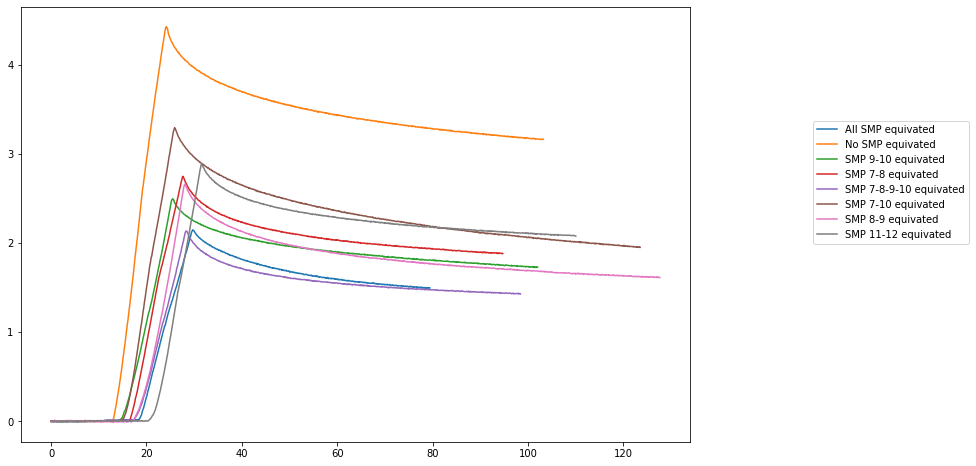

In [121]:
fig = plt.figure(2, figsize = (12,8))
ax = fig.add_subplot(111)
plt.plot(dff60ALL['Time'],dff60ALL['Fy'], label = 'All SMP equivated')
plt.plot(dff60NO['Time'],dff60NO['Fy'], label = 'No SMP equivated')
plt.plot(dff60_910['Time'],dff60_910['Fy'], label = 'SMP 9-10 equivated')
plt.plot(dff60_78['Time'],dff60_78['Fy'], label = 'SMP 7-8 equivated')
plt.plot(dff60_78910['Time'],dff60_78910['Fy'], label = 'SMP 7-8-9-10 equivated')
plt.plot(dff60_710['Time'],dff60_710['Fy'], label = 'SMP 7-10 equivated')
plt.plot(dff60_89['Time'],dff60_89['Fy'], label = 'SMP 8-9 equivated')
plt.plot(dff60_1112['Time'],dff60_1112['Fy'], label = 'SMP 11-12 equivated')
#plt.plot(dffY1112['Time'],dffY1112['Fy'], label = 'EVAL')
lgd = ax.legend(loc=9, bbox_to_anchor=(1.3,0.75))
plt.show()

In [122]:
ALL60tmp = [dff60ALL,dff60NO,dff60_910,dff60_78, dff60_78910, dff60_710,dff60_89,dff60_1112]
ALL60 = pd.concat(ALL60tmp)

# Preprocessing on XY30

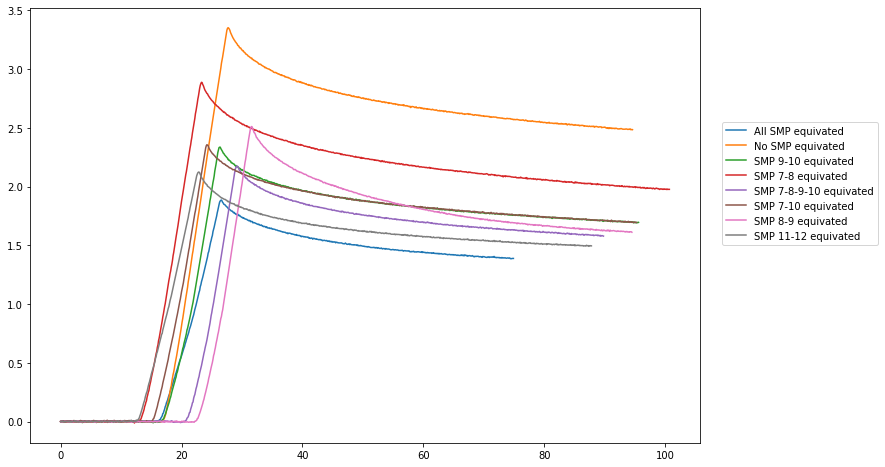

In [123]:
dff30ALL = pd.read_csv('XY30-ALLEQUIV.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) #XY66 All equiv
dff30NO =  pd.read_csv('XY30-NO.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) #XY66 No equiv
dff30_910 = pd.read_csv('XY30-9-10.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) #XY66 equiv 9-10
dff30_78 = pd.read_csv('XY30-7-8.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) #XY66 equiv 7-8
dff30_78910 = pd.read_csv('XY30-7-8-9-10.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) #XY66 equiv 78910
dff30_710 = pd.read_csv('XY30-7-10.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) #XY66 equiv 7-10
dff30_89 = pd.read_csv('XY30-8-9.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) #XY66 equiv 7-10
dff30_1112 = pd.read_csv('XY30-11-12.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) #XY66 equiv 11_12


d = [dff30ALL,dff30NO,dff30_910,dff30_78, dff30_78910, dff30_710,dff30_89,dff30_1112]
for df in d: 
    df['Time'] = df['Time']-df['Time'][0]
    df['Time'] = df['Time']/1000
    df['Fx'] = -1*df['Fx']
    df['Fx'] = df['Fx'] - df['Fx'][0]
    df['Fy'] = df['Fy'] - df['Fy'][0]
    df['Fz'] = df['Fz'] - df['Fz'][0]
    df['Tx'] = df['Tx'] - df['Tx'][0]
    df['Ty'] = df['Ty'] - df['Ty'][0]
    df['Tz'] = df['Tz'] - df['Tz'][0]
    
    
    
fig = plt.figure(2, figsize = (12,8))
ax = fig.add_subplot(111)
plt.plot(dff30ALL['Time'],dff30ALL['Fx'], label = 'All SMP equivated')
plt.plot(dff30NO['Time'],dff30NO['Fx'], label = 'No SMP equivated')
plt.plot(dff30_910['Time'],dff30_910['Fx'], label = 'SMP 9-10 equivated')
plt.plot(dff30_78['Time'],dff30_78['Fx'], label = 'SMP 7-8 equivated')
plt.plot(dff30_78910['Time'],dff30_78910['Fx'], label = 'SMP 7-8-9-10 equivated')
plt.plot(dff30_710['Time'],dff30_710['Fx'], label = 'SMP 7-10 equivated')
plt.plot(dff30_89['Time'],dff30_89['Fx'], label = 'SMP 8-9 equivated')
plt.plot(dff30_1112['Time'],dff30_1112['Fx'], label = 'SMP 11-12 equivated')
#plt.plot(dffY1112['Time'],dffY1112['Fy'], label = 'EVAL')
lgd = ax.legend(loc=9, bbox_to_anchor=(1.15,0.75))
plt.show()

In [124]:
#adding Forces and SMP excitations
#length of the string pulling 
#277-166 X = 112
#231-166 = 65
tmp = np.linspace(0,11085,112)
tmp2 = np.linspace(0,6400,65)
columns = ['X','Y','Z','SMP7','SMP8','SMP9','SMP10','SMP11','SMP12']
d2 = list()
for df in d: 
    i = int(df[['Fx']].idxmax())   #finding the max value of 'Fx' corresponding to the end of the pulling
    j = int(df[['Fy']].idxmax())
    dtmp = pd.DataFrame(np.zeros((len(df),len(columns))),columns = columns)
    dtmp['Y'][i-112:i-112+65] = tmp2
    dtmp['Y'][i-112+65:]=6400
    dtmp['X'][i-112:i] = tmp
    dtmp['X'][i:]=11085     
    df = pd.concat([df,dtmp], axis = 1)
    d2.append(df)
    
"""
    for i in range(len(df)): #Start everything when the peak occur
        if df['Fx'][i+10]-df['Fx'][i] > 0.12:
            tmp3 = i
            print(i)
            break
    df = df[tmp3:]
    df['Time'] = df['Time'] - df['Time'][i] 
    """
    
    

dff30ALL,dff30NO,dff30_910,dff30_78, dff30_78910, dff30_710,dff30_89,dff30_1112 = d2[:]

#CASE BY CASE SMP 

#DFXNO ==> No SMP

#DFXALL
tmp = np.ones(len(dff30ALL))
for i in columns[3:]:
    dff30ALL[i] = tmp
#DFX9101112
tmp = np.ones(len(dff30_78910))
for i in columns[3:7]:
    dff30_78910[i] = tmp
    
#DFX78
tmp = np.ones(len(dff30_78))
dff30_78['SMP7'] = tmp
dff30_78['SMP8'] = tmp

#DFX910
tmp = np.ones(len(dff30_910))
dff30_910['SMP9']=tmp
dff30_910['SMP10']=tmp
#DFX912
tmp = np.ones(len(dff30_710))
dff30_710['SMP7']=tmp
dff30_710['SMP10']=tmp
#DFX1011
tmp = np.ones(len(dff30_89))
dff30_89['SMP8']=tmp
dff30_89['SMP9']=tmp
#DFX1011
tmp = np.ones(len(dff30_1112))
dff30_1112['SMP11']=tmp
dff30_1112['SMP12']=tmp

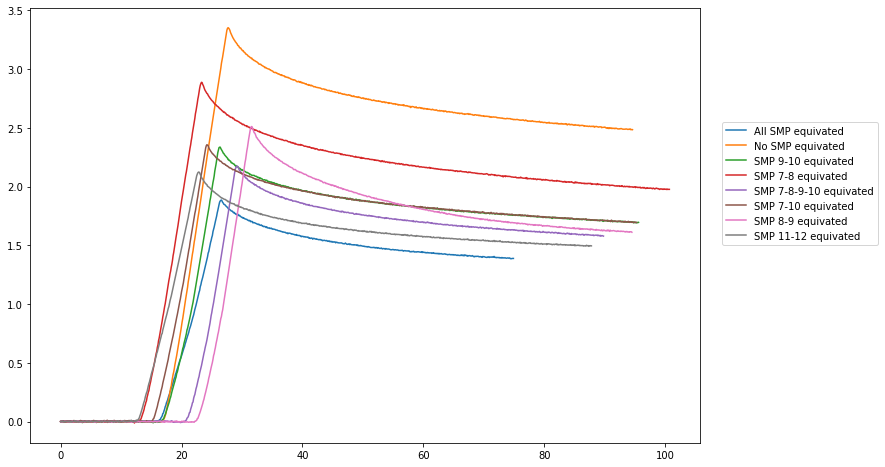

In [125]:
fig = plt.figure(2, figsize = (12,8))
ax = fig.add_subplot(111)
plt.plot(dff30ALL['Time'],dff30ALL['Fx'], label = 'All SMP equivated')
plt.plot(dff30NO['Time'],dff30NO['Fx'], label = 'No SMP equivated')
plt.plot(dff30_910['Time'],dff30_910['Fx'], label = 'SMP 9-10 equivated')
plt.plot(dff30_78['Time'],dff30_78['Fx'], label = 'SMP 7-8 equivated')
plt.plot(dff30_78910['Time'],dff30_78910['Fx'], label = 'SMP 7-8-9-10 equivated')
plt.plot(dff30_710['Time'],dff30_710['Fx'], label = 'SMP 7-10 equivated')
plt.plot(dff30_89['Time'],dff30_89['Fx'], label = 'SMP 8-9 equivated')
plt.plot(dff30_1112['Time'],dff30_1112['Fx'], label = 'SMP 11-12 equivated')
#plt.plot(dffY1112['Time'],dffY1112['Fy'], label = 'EVAL')
lgd = ax.legend(loc=9, bbox_to_anchor=(1.15,0.75))
plt.show()

In [126]:
ALL30tmp = [dff30ALL,dff30NO,dff30_910,dff30_78, dff30_78910, dff30_710,dff30_89,dff30_1112]
ALL30 = pd.concat(ALL30tmp)

# Preprocessing on XY66° for testing ONLY

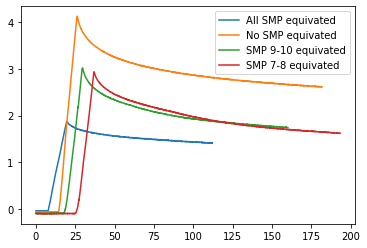

In [67]:
dffYALL = pd.read_csv('XY66-12800-ALLEQUIV.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) #XY66 All equiv
dffYNO =  pd.read_csv('XY66-12800-NOEQUIV.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) #XY66 No equiv
dffY910 = pd.read_csv('XY66-12800-9-10.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) #XY66 equiv 9-10
dffY78 = pd.read_csv('XY66-12800-7-8.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) #XY66 equiv 7-8
dffY78910 = pd.read_csv('XY66-12800-7-8-9-10.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) #XY66 equiv 78910
dffY710 = pd.read_csv('XY66-12800-7-10.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) #XY66 equiv 7-10
dffY89 = pd.read_csv('XY66-12800-8-9.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) #XY66 equiv 7-10
dffY1112 = pd.read_csv('XY66-12800-11-12.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) #XY66 equiv 11_12




d = [dffYALL,dffYNO,dffY910,dffY78, dffY78910, dffY710,dffY89,dffY1112 ]
for df in d: 
    df['Time'] = df['Time']-df['Time'][0]
    df['Time'] = df['Time']/1000
    df['Fx'] = -1*df['Fx']
    #df['F'] = np.sqrt(df['Fx']**2+df['Fy']**2)
    
plt.plot(dffYALL['Time'],dffYALL['Fy'], label = 'All SMP equivated')
plt.plot(dffYNO['Time'],dffYNO['Fy'], label = 'No SMP equivated')
plt.plot(dffY910['Time'],dffY910['Fy'], label = 'SMP 9-10 equivated')
plt.plot(dffY78['Time'],dffY78['Fy'], label = 'SMP 7-8 equivated')
#plt.plot(dffY1112['Time'],dffY1112['Fy'], label = 'EVAL')
plt.legend(loc='best')
plt.show()

In [201]:
#adding Forces and SMP excitations
#length (timesteps) of the string pulling X (134-79) = 55
#length (timesteps) of the string pulling Y (198-79) = 119

tmp1 = np.linspace(0,5206,55)
tmp2 = np.linspace(0,11693,119)
columns = ['X','Y','Z','SMP7','SMP8','SMP9','SMP10','SMP11','SMP12']
d2 = list()

for df in d: 
    i = int(df[['Fx']].idxmax())    #finding the max value of 'Fx' = end of pulling
    j = int(df[['Fy']].idxmax())   #finding the max value of 'Fy' corresponding to the end of the pulling
    dtmp = pd.DataFrame(np.zeros((len(df),len(columns))),columns = columns)
    dtmp['X'][j-55:j] = tmp1
    dtmp['X'][j:]=5206
    dtmp['Y'][i-119:i] = tmp2
    dtmp['Y'][i:]=11693     
    df = pd.concat([df,dtmp], axis = 1)
    d2.append(df)

dffYALL,dffYNO,dffY910,dffY78,dffY78910,dffY710,dffY89,dffY1112 = d2[:]

#ADDING THE SMPs
#dffYNO --> No equivation

#dffYALL
tmp = np.ones(len(dffYALL))
for i in columns[3:]:
    dffYALL[i] = tmp
#dffY910
tmp = np.ones(len(dffY910))
for i in columns[5:7]:
    dffY910[i] = tmp
#dffY78
tmp = np.ones(len(dffY78))
for i in columns[3:5]:
    dffY78[i] = tmp
#dffY78910
tmp = np.ones(len(dffY78910))
for i in columns[3:7]:
    dffY78910[i] = tmp
#dffY710
tmp = np.ones(len(dffY710))
dffY710['SMP7'] = tmp
dffY710['SMP10'] = tmp
#dffY89
tmp = np.ones(len(dffY89))
for i in columns[4:6]:
    dffY89[i] = tmp
#dffY1112
tmp = np.ones(len(dffY1112))
for i in columns[7:9]:
    dffY1112[i] = tmp
    
YALLtmp = [dffYALL,dffYNO,dffY910,dffY78,dffY78910,dffY710,dffY89,dffY1112]


In [202]:
YALL = pd.concat(YALLtmp)


# XY 15° : A bit random values for testing the model
x = 12364
y = 3313

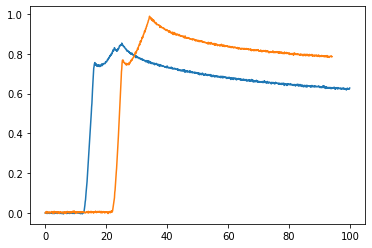

In [127]:
dff15_1011 = pd.read_csv('test/X15-10-11.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) 
dff15_912 =  pd.read_csv('test/XY15-9-12--2.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) 
#dffY910 = pd.read_csv('XY66-12800-9-10.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) #XY66 equiv 9-10
#dffY78 = pd.read_csv('XY66-12800-7-8.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) #XY66 equiv 7-8
#dffY78910 = pd.read_csv('XY66-12800-7-8-9-10.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time'])

d = [dff15_1011,dff15_912]
for df in d: 
    df['Time'] = df['Time']-df['Time'][0]
    df['Time'] = df['Time']/1000
    df['Fx'] = -1*df['Fx']
    df['Fx'] = df['Fx'] - df['Fx'][0]
    df['Fy'] = df['Fy'] - df['Fy'][0]
    df['Fz'] = df['Fz'] - df['Fz'][0]
    df['Tx'] = df['Tx'] - df['Tx'][0]
    df['Ty'] = df['Ty'] - df['Ty'][0]
    df['Tz'] = df['Tz'] - df['Tz'][0]
    
plt.plot(dff15_912['Time'],dff15_912['Fy'])
plt.plot(dff15_1011['Time'],dff15_1011['Fy'])

In [204]:
#dff15
#269-146 = 124 #X
#180-146 = 34  #Y

In [128]:
tmp1 = np.linspace(0,12364,124)
tmp2 = np.linspace(0,3313,34)
columns = ['X','Y','Z','SMP7','SMP8','SMP9','SMP10','SMP11','SMP12']

d2 = list()

for df in d: 
    i = int(df[['Fx']].idxmax())    #finding the max value of 'Fx' = end of pulling
    j = int(df[['Fy']].idxmax())   #finding the max value of 'Fy' corresponding to the end of the pulling
    dtmp = pd.DataFrame(np.zeros((len(df),len(columns))),columns = columns)
    dtmp['Y'][i-124:i-124+34] = tmp2
    dtmp['Y'][i-124+34:]=3313
    dtmp['X'][i-124:i] = tmp1
    dtmp['X'][i:]=12364     
    df = pd.concat([df,dtmp], axis = 1)
    d2.append(df)
    """
    for i in range(len(df)): #Start everything when the peak occur
        if df['Fx'][i+10]-df['Fx'][i] > 0.12:
            tmp3 = i
            print(i)
            break
    df = df[tmp3:]
    """
    

dff15_1011,dff15_912 = d2[:]

tmp = np.ones(len(dff15_1011))
dff15_1011['SMP10'] = tmp
dff15_1011['SMP11'] = tmp

tmp = np.ones(len(dff15_912))
dff15_912['SMP9'] = tmp
dff15_912['SMP12'] = tmp

TrueTest = pd.concat([dff15_1011,dff15_912])
#TrueTest = dff15_1011

In [206]:
#dff15_1011.sample(20)

# XY 45° : 
x = 9051
y = 9051

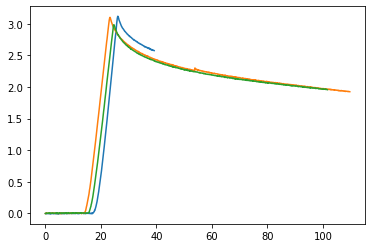

In [129]:
dff45_8 = pd.read_csv('test/X45-8.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) 
dff45_710 =  pd.read_csv('test/XY45-7-10-2.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) 
dff45_1011 =  pd.read_csv('test/XY45-10-11.txt',names = ['Fx','Fy','Fz','Tx','Ty','Tz','Time']) 

d = [dff45_8, dff45_710,dff45_1011]
for df in d: 
    df['Time'] = df['Time']-df['Time'][0]
    df['Time'] = df['Time']/1000
    df['Fx'] = -1*df['Fx']
    df['Fx'] = df['Fx'] - df['Fx'][0]
    df['Fy'] = df['Fy'] - df['Fy'][0]
    df['Fz'] = df['Fz'] - df['Fz'][0]
    df['Tx'] = df['Tx'] - df['Tx'][0]
    df['Ty'] = df['Ty'] - df['Ty'][0]
    df['Tz'] = df['Tz'] - df['Tz'][0]
    
plt.plot(dff45_8['Time'],dff45_8['Fy'])
plt.plot(dff45_710['Time'],dff45_710['Fy'])
plt.plot(dff45_1011['Time'],dff45_1011['Fy'])


In [130]:
columns = ['X','Y','Z','SMP7','SMP8','SMP9','SMP10','SMP11','SMP12']

tmp = np.linspace(0,9051,81)

d2 = list()

for df in d: 
    i = int(df[['Fx']].idxmax())    #finding the max value of 'Fx' = end of pulling   #finding the max value of 'Fy' corresponding to the end of the pulling
    dtmp = pd.DataFrame(np.zeros((len(df),len(columns))),columns = columns)
    dtmp['Y'][i-81:i] = tmp
    dtmp['Y'][i:]=9051
    dtmp['X'][i-81:i] = tmp
    dtmp['X'][i:]=9051     
    df = pd.concat([df,dtmp], axis = 1)
    d2.append(df)
    """
    for i in range(len(df)): #Start everything when the peak occur
        if df['Fx'][i+10]-df['Fx'][i] > 0.12:
            tmp3 = i
            print(i)
            break
    df = df[tmp3:]
    """
    

dff45_8, dff45_710,dff45_1011 = d2[:]

tmp = np.ones(len(dff45_8))
dff45_8['SMP8'] = tmp

tmp = np.ones(len(dff45_710))
dff45_710['SMP7'] = tmp
dff45_710['SMP10'] = tmp

tmp = np.ones(len(dff45_1011))
dff45_1011['SMP10'] = tmp
dff45_1011['SMP11'] = tmp



In [131]:
d15 = [dff15_1011,dff15_912]
d45 = [dff45_8,dff45_710,dff45_1011]
d_test = pd.concat([dff15_1011,dff15_912,dff45_8,dff45_710,dff45_1011])
d_test.sample(n=100)

,Fx,Fy,Fz,Tx,Ty,Tz,Time,X,Y,Z,SMP7,SMP8,SMP9,SMP10,SMP11,SMP12
379,2.085,0.743,0.191,6.227,-70.859,3.528,37.900,12364.000000,3313.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
976,0.960,1.978,0.251,-38.636,-45.686,-5.405,97.603,9051.000000,9051.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
71,0.002,0.004,-0.013,0.024,-0.005,-0.001,7.100,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
612,1.562,2.209,0.253,-35.742,-64.797,0.438,61.201,9051.000000,9051.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
799,2.087,0.803,0.203,4.617,-72.330,2.181,79.902,12364.000000,3313.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,0.968,2.043,0.263,-40.051,-46.470,-5.741,85.202,9051.000000,9051.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
312,1.910,0.864,0.187,1.615,-68.215,1.345,31.201,9247.869919,3313.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
739,0.987,2.096,0.272,-41.521,-47.344,-6.024,73.901,9051.000000,9051.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
800,0.978,2.060,0.258,-40.742,-46.793,-5.899,80.003,9051.000000,9051.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


# Attempt to run a model

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import MinMaxScaler

In [132]:
ALL = pd.concat([XALL,ALL30,ALL60])



features_train = ['Time','X','Y','Z','SMP7','SMP8','SMP9','SMP10','SMP11','SMP12']
features_target = ['Fx','Fy','Fz','Tx','Ty','Tz']

X = ALL[features_train]

scaler = MinMaxScaler()
scaler.fit(X)
X_sc = scaler.transform(X)

y = ALL[features_target]

#X_train, X_test, y_train, y_test = train_test_split(X_sc,y,test_size = 0.2)


X_test = d_test[features_train]
y_test = d_test[features_target]
X_test_sc = scaler.transform(X_test)

In [134]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.utils import plot_model

In [187]:
def cnn_model():
    model = models.Sequential()
    model.add(layers.Dense(units=20, activation='swish', input_shape=[10]))
    model.add(layers.Dense(15, activation='swish'))
    model.add(layers.Dense(12,activation='swish'))
    model.add(layers.Dense(6))
    return model

def cnn_model2():
    model = models.Sequential()
    model.add(layers.Dense(units=20, activation='sigmoid', input_shape=[10]))
    model.add(layers.Dense(15, activation='sigmoid'))
    model.add(layers.Dense(12,activation='sigmoid'))
    model.add(layers.Dense(6))
    return model

In [188]:
model = cnn_model()
model.summary()


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_59 (Dense)             (None, 15)                315       
_________________________________________________________________
dense_60 (Dense)             (None, 12)                192       
_________________________________________________________________
dense_61 (Dense)             (None, 6)                 78        
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


In [189]:
model.compile(
    optimizer="adamax",
    loss='mse',
    metrics = 'mse'
)

history = model.fit(
    X_sc, y,
    validation_data=(X_test_sc, y_test),
    batch_size=100,
    callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
    epochs=50)

Epoch 1/50
238/238 [==============================] - 1s 3ms/step - loss: 614.4349 - mse: 614.4349 - val_loss: 384.9973 - val_mse: 384.9973
Epoch 2/50
238/238 [==============================] - 1s 2ms/step - loss: 309.0066 - mse: 309.0066 - val_loss: 138.3696 - val_mse: 138.3696
Epoch 3/50
238/238 [==============================] - 0s 2ms/step - loss: 184.9083 - mse: 184.9083 - val_loss: 107.5763 - val_mse: 107.5763
Epoch 4/50
238/238 [==============================] - 0s 2ms/step - loss: 135.4975 - mse: 135.4975 - val_loss: 102.2654 - val_mse: 102.2654
Epoch 5/50
238/238 [==============================] - 1s 2ms/step - loss: 116.2190 - mse: 116.2190 - val_loss: 90.0614 - val_mse: 90.0614
Epoch 6/50
238/238 [==============================] - 1s 2ms/step - loss: 85.4845 - mse: 85.4845 - val_loss: 64.0022 - val_mse: 64.0022
Epoch 7/50
238/238 [==============================] - 1s 2ms/step - loss: 41.0171 - mse: 41.0171 - val_loss: 33.9681 - val_mse: 33.9681
Epoch 8/50
238/238 [==========

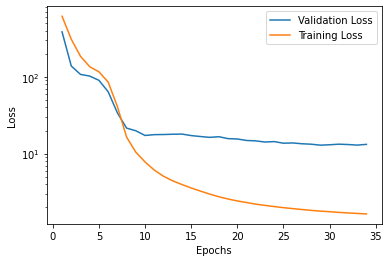

In [195]:
loss_values = history.history['loss']
loss_values_val = history.history['val_loss']
epochs = range(1, len(loss_values)+1)

plt.semilogy(epochs, loss_values_val, label = "Validation Loss")
plt.semilogy(epochs, loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [139]:
predicted = pd.DataFrame(model.predict(X_test), columns = ['Fx_p','Fy_p','Fz_p','Tx_p','Ty_p','Tz_p'])

In [292]:
X_test

,Time,X,Y,Z,SMP7,SMP8,SMP9,SMP10,SMP11,SMP12
0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.100,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.200,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.301,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.400,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1012,101.203,9051.0,9051.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1013,101.303,9051.0,9051.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1014,101.403,9051.0,9051.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1015,101.503,9051.0,9051.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [141]:
y_test

,Fx,Fy,Fz,Tx,Ty,Tz
0,0.000,0.000,0.000,0.000,0.000,0.000
1,0.002,0.004,-0.003,0.009,0.004,0.000
2,-0.002,0.001,0.000,0.050,0.012,-0.009
3,0.002,0.004,0.005,0.050,0.030,0.000
4,0.002,0.001,-0.005,-0.006,0.020,-0.010
...,...,...,...,...,...,...
1012,0.957,1.960,0.256,-38.230,-45.423,-5.324
1013,0.950,1.961,0.244,-38.221,-45.430,-5.332
1014,0.955,1.961,0.249,-38.181,-45.412,-5.332
1015,0.957,1.960,0.254,-38.175,-45.358,-5.323


# True Input


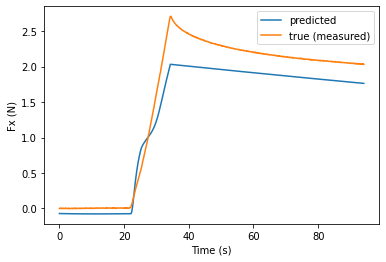

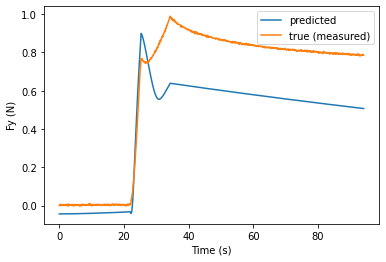

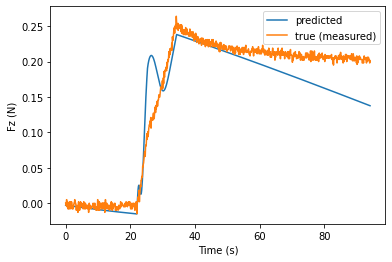

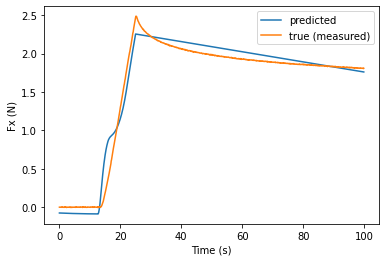

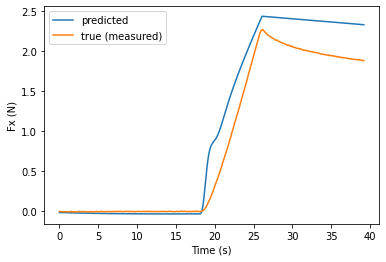

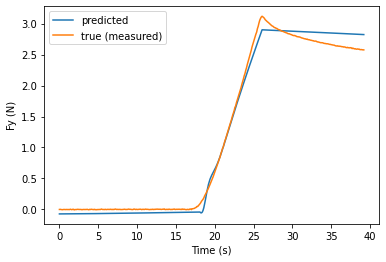

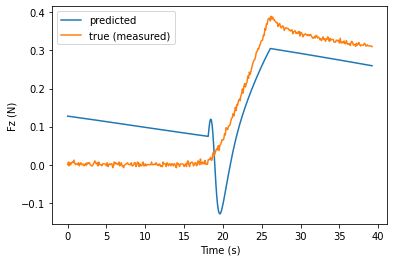

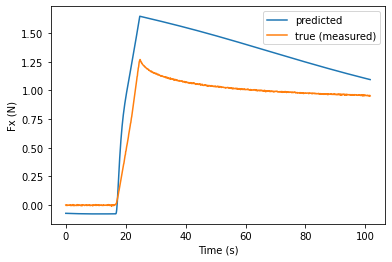

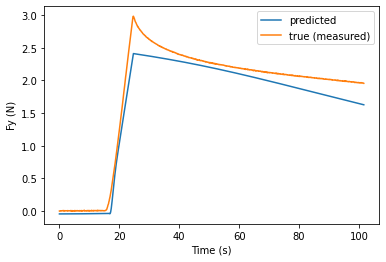

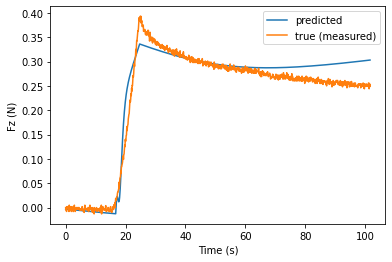

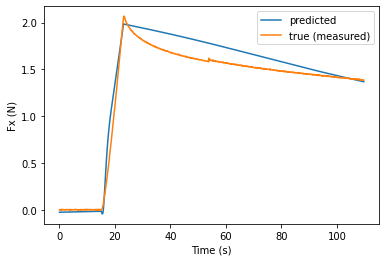

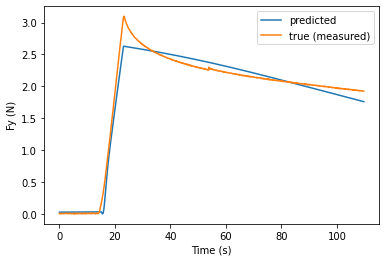

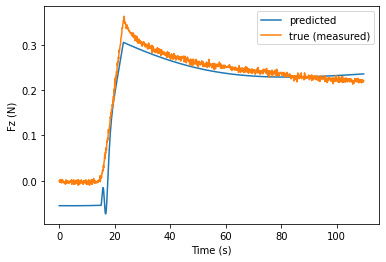

In [261]:
Peaks_pred = []
Peaks_true = []

datatrue = dff15_1011
Xtruetest = datatrue[features_train]
ytruetest = datatrue[features_target]

Xtruetestsc = scaler.transform(Xtruetest)
y_pred = pd.DataFrame(model.predict(Xtruetestsc), columns = features_target)
for i in features_target:
    Peaks_pred.append(y_pred[i].abs().max())
    Peaks_true.append(ytruetest[i].abs().max())

plt.plot(Xtruetest['Time'],y_pred['Fx'], label = 'predicted')
plt.plot(Xtruetest['Time'],ytruetest['Fx'],label = 'true (measured)')
plt.xlabel('Time (s)')
plt.ylabel('Fx (N)')
plt.legend(loc = 'best')
plt.show()

plt.plot(Xtruetest['Time'],y_pred['Fy'], label = 'predicted')
plt.plot(Xtruetest['Time'],ytruetest['Fy'],label = 'true (measured)')
plt.xlabel('Time (s)')
plt.ylabel('Fy (N)')
plt.legend(loc = 'best')
plt.show()

plt.plot(Xtruetest['Time'],y_pred['Fz'], label = 'predicted')
plt.plot(Xtruetest['Time'],ytruetest['Fz'],label = 'true (measured)')
plt.xlabel('Time (s)')
plt.ylabel('Fz (N)')
plt.legend(loc = 'best')
plt.show()

datatrue = dff15_912
Xtruetest = datatrue[features_train]
ytruetest = datatrue[features_target]

Xtruetestsc = scaler.transform(Xtruetest)
y_pred = pd.DataFrame(model.predict(Xtruetestsc), columns = features_target)

for i in features_target:
    Peaks_pred.append(y_pred[i].abs().max())
    Peaks_true.append(ytruetest[i].abs().max())

plt.plot(Xtruetest['Time'],y_pred['Fx'], label = 'predicted')
plt.plot(Xtruetest['Time'],ytruetest['Fx'],label = 'true (measured)')
plt.xlabel('Time (s)')
plt.ylabel('Fx (N)')
plt.legend(loc = 'best')
plt.show()

#plt.plot(Xtruetest['Time'],y_pred['Fy'], label = 'predicted')
#plt.plot(Xtruetest['Time'],ytruetest['Fy'],label = 'true (measured)')
#plt.xlabel('Time (s)')
#plt.ylabel('Fy (N)')
#plt.legend(loc = 'best')
#plt.show()

#plt.plot(Xtruetest['Time'],y_pred['Fz'], label = 'predicted')
#plt.plot(Xtruetest['Time'],ytruetest['Fz'],label = 'true (measured)')
#plt.xlabel('Time (s)')
#plt.ylabel('Fz (N)')
#plt.legend(loc = 'best')
#plt.show()

datatrue = dff45_8
Xtruetest = datatrue[features_train]
ytruetest = datatrue[features_target]

Xtruetestsc = scaler.transform(Xtruetest)
y_pred = pd.DataFrame(model.predict(Xtruetestsc), columns = features_target)

for i in features_target:
    Peaks_pred.append(y_pred[i].abs().max())
    Peaks_true.append(ytruetest[i].abs().max())

plt.plot(Xtruetest['Time'],y_pred['Fx'], label = 'predicted')
plt.plot(Xtruetest['Time'],ytruetest['Fx'],label = 'true (measured)')
plt.xlabel('Time (s)')
plt.ylabel('Fx (N)')
plt.legend(loc = 'best')
plt.show()

plt.plot(Xtruetest['Time'],y_pred['Fy'], label = 'predicted')
plt.plot(Xtruetest['Time'],ytruetest['Fy'],label = 'true (measured)')
plt.xlabel('Time (s)')
plt.ylabel('Fy (N)')
plt.legend(loc = 'best')
plt.show()

plt.plot(Xtruetest['Time'],y_pred['Fz'], label = 'predicted')
plt.plot(Xtruetest['Time'],ytruetest['Fz'],label = 'true (measured)')
plt.xlabel('Time (s)')
plt.ylabel('Fz (N)')
plt.legend(loc = 'best')
plt.show()

datatrue = dff45_1011
Xtruetest = datatrue[features_train]
ytruetest = datatrue[features_target]

Xtruetestsc = scaler.transform(Xtruetest)
y_pred = pd.DataFrame(model.predict(Xtruetestsc), columns = features_target)

for i in features_target:
    Peaks_pred.append(y_pred[i].abs().max())
    Peaks_true.append(ytruetest[i].abs().max())

plt.plot(Xtruetest['Time'],y_pred['Fx'], label = 'predicted')
plt.plot(Xtruetest['Time'],ytruetest['Fx'],label = 'true (measured)')
plt.xlabel('Time (s)')
plt.ylabel('Fx (N)')
plt.legend(loc = 'best')
plt.show()

plt.plot(Xtruetest['Time'],y_pred['Fy'], label = 'predicted')
plt.plot(Xtruetest['Time'],ytruetest['Fy'],label = 'true (measured)')
plt.xlabel('Time (s)')
plt.ylabel('Fy (N)')
plt.legend(loc = 'best')
plt.show()

plt.plot(Xtruetest['Time'],y_pred['Fz'], label = 'predicted')
plt.plot(Xtruetest['Time'],ytruetest['Fz'],label = 'true (measured)')
plt.xlabel('Time (s)')
plt.ylabel('Fz (N)')
plt.legend(loc = 'best')
plt.show()

datatrue = dff45_710
Xtruetest = datatrue[features_train]
ytruetest = datatrue[features_target]

Xtruetestsc = scaler.transform(Xtruetest)
y_pred = pd.DataFrame(model.predict(Xtruetestsc), columns = features_target)

for i in features_target:
    Peaks_pred.append(y_pred[i].abs().max())
    Peaks_true.append(ytruetest[i].abs().max())

plt.plot(Xtruetest['Time'],y_pred['Fx'], label = 'predicted')
plt.plot(Xtruetest['Time'],ytruetest['Fx'],label = 'true (measured)')
plt.xlabel('Time (s)')
plt.ylabel('Fx (N)')
plt.legend(loc = 'best')
plt.show()

plt.plot(Xtruetest['Time'],y_pred['Fy'], label = 'predicted')
plt.plot(Xtruetest['Time'],ytruetest['Fy'],label = 'true (measured)')
plt.xlabel('Time (s)')
plt.ylabel('Fy (N)')
plt.legend(loc = 'best')
plt.show()

plt.plot(Xtruetest['Time'],y_pred['Fz'], label = 'predicted')
plt.plot(Xtruetest['Time'],ytruetest['Fz'],label = 'true (measured)')
plt.xlabel('Time (s)')
plt.ylabel('Fz (N)')
plt.legend(loc = 'best')
plt.show()

In [226]:
error = []
for i in range(len(Peaks_pred)):
    error.append(np.abs(Peaks_true[i]-Peaks_pred[i])/Peaks_true[i])
errorX = 1/5*(error[0]+error[6]+error[12]+error[18]+error[24])
errorY = 1/5*(error[1]+error[7]+error[13]+error[19]+error[25])
errorZ = 1/5*(error[2]+error[8]+error[14]+error[20]+error[26])
errorTx = 1/5*(error[3]+error[9]+error[15]+error[21]+error[27])
errorTy = 1/5*(error[4]+error[10]+error[16]+error[22]+error[28])
errorTz = 1/5*(error[5]+error[11]+error[17]+error[23]+error[29])

print(errorX, errorY, errorZ, errorTx, errorTy, errorTz)
print(1/3*(errorX+ errorY+ errorZ),1/3*(errorTx+ errorTy+ errorTz),np.mean(error))

0.15086671288565104 0.1357522733800843 0.20216036963132067 0.12082192050795466 0.09607190359771255 0.802114806535594
0.16292645196568534 0.339669543547087 0.2512979977563862


# Invented Input - for generalization

In [314]:
R = 12800
alpha = np.linspace(0,np.pi/3,100)
X = R*np.cos(alpha)
Y = R*np.sin(alpha)
Z = np.zeros(100)
Time = 25*np.ones(100)
SMP7,SMP8,SMP9,SMP10,SMP11,SMP12 = np.zeros(100),np.zeros(100),np.zeros(100),np.zeros(100),np.zeros(100),np.zeros(100)

In [320]:
Generalization = pd.DataFrame([Time,X,Y,Z,SMP7,SMP8,SMP9,SMP10,SMP11,SMP12], index = ['Time','X','Y','Z',
                                                                                     'SMP7','SMP8','SMP9','SMP10','SMP11','SMP12'])
Generalization = Generalization.T
Generalization

SMP7,SMP8,SMP9,SMP10,SMP11,SMP12 = np.ones(100),np.ones(100),np.ones(100),np.ones(100),np.ones(100),np.ones(100)
Gen2 = pd.DataFrame([Time,X,Y,Z,SMP7,SMP8,SMP9,SMP10,SMP11,SMP12], index = ['Time','X','Y','Z',
                                                                                     'SMP7','SMP8','SMP9','SMP10','SMP11','SMP12'])
Gen2

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Time,25.0,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
X,12800.0,12799.283918,12797.135752,12793.555743,12788.544290,12782.101955,12774.229459,12764.927682,12754.197665,12742.040609,...,7424.728443,7314.025425,7202.504058,7090.176817,6977.056273,6863.155081,6748.485985,6633.061817,6516.895489,6400.000000
Y,0.0,135.392714,270.770279,406.117549,541.419379,676.660630,811.826172,946.900880,1081.869641,1216.717354,...,10426.572186,10504.524362,10581.301210,10656.894139,10731.294692,10804.494543,10876.485503,10947.259517,11016.808666,11085.125168
Z,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SMP7,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
SMP8,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
SMP9,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
SMP10,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
SMP11,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
SMP12,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [322]:
Force_smp

0     1.866436
1     1.862689
2     1.858724
3     1.854546
4     1.850166
        ...   
95    2.236927
96    2.232502
97    2.226875
98    2.219626
99    2.210328
Length: 100, dtype: float32

In [316]:
Generalization = scaler.transform(Generalization)
Gen2 = scaler.transform(Gen2)
y_pred = pd.DataFrame(model.predict(Generalization), columns = features_target)
Force = (y_pred['Fx']**2 + y_pred['Fy']**2)**0.5
y_pred_smp = pd.DataFrame(model.predict(Gen2), columns = features_target)
Force_smp = (y_pred_smp['Fx']**2 + y_pred_smp['Fy']**2)**0.5

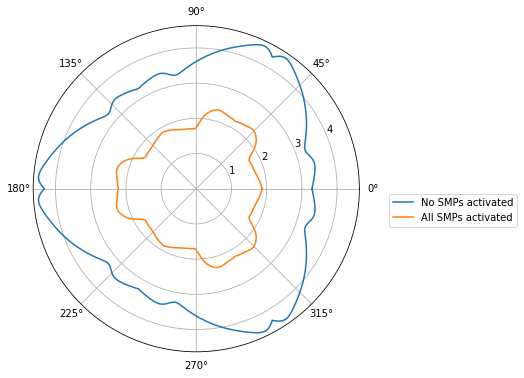

In [333]:
alpha2 = np.concatenate([alpha, np.pi/3+alpha,2*np.pi/3+alpha,3*np.pi/3+alpha,4*np.pi/3+alpha,5*np.pi/3+alpha])
Force = np.array(Force)
Force2 = np.concatenate([Force,np.flip(Force),Force,np.flip(Force),Force,np.flip(Force)])
Force_smp2 = np.concatenate([Force_smp,np.flip(Force_smp),Force_smp,np.flip(Force_smp),Force_smp,np.flip(Force_smp)])

fig = plt.figure(2, figsize = (8,6))

plt.polar(alpha2,Force2, label = "No SMPs activated")
plt.polar(alpha2,Force_smp2, label = "All SMPs activated")
plt.legend(loc='best', bbox_to_anchor=(1, 0., 0.5, 0.5))
plt.show()




In [196]:
X_inv = np.zeros((100,10))
X_inv = pd.DataFrame(X_inv, columns = features_train)
X_inv['Time'] = np.linspace(0,99,100)
tmp = np.linspace(0,6000,8)
tmp2 = np.linspace(0,5000,6)
X_inv['X'][20:28] = tmp
X_inv['X'][28:] = 6000
X_inv['Y'][20:26] = tmp2
X_inv['Y'][26:] = 5000
tmp3 = np.ones(100)
X_inv['SMP7'] = tmp3
X_inv['SMP8'] = tmp3
X_inv['SMP9'] = tmp3
X_inv[15:25]

X_inv = scaler.transform(X_inv)

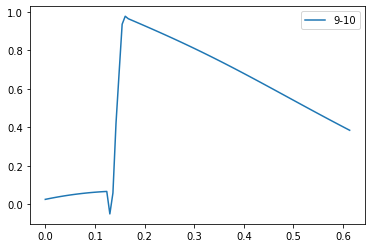

In [197]:
#scaler.fit(X)
#X_inv2 = X_inv
#X_inv2['SMP7'] = tmp3
#X_inv2['SMP8'] = tmp3
#X_inv2 = scaler.transform(X_inv2)


y_inv = pd.DataFrame(model.predict(X_inv), columns = features_target)
#y_inv2 = pd.DataFrame(model.predict(X_inv2), columns = features_target)
plt.plot(X_inv[:,0],y_inv['Fy'], label = '9-10')
#plt.plot(X_inv2[:,0],y_inv2['Fx'], label = '7-8-9-10')
plt.legend(loc = 'best')
plt.show()

In [155]:
pd.DataFrame(X_inv)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000000,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1,0.005173,0.000000,0.000000,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2,0.010347,0.000000,0.000000,0.0,1.0,1.0,1.0,1.0,0.0,0.0
3,0.015520,0.000000,0.000000,0.0,1.0,1.0,1.0,1.0,0.0,0.0
4,0.020693,0.000000,0.000000,0.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
95,0.491459,0.859375,0.427606,0.0,1.0,1.0,1.0,1.0,0.0,0.0
96,0.496632,0.859375,0.427606,0.0,1.0,1.0,1.0,1.0,0.0,0.0
97,0.501805,0.859375,0.427606,0.0,1.0,1.0,1.0,1.0,0.0,0.0
98,0.506979,0.859375,0.427606,0.0,1.0,1.0,1.0,1.0,0.0,0.0


In [100]:
X_inv

,Time,X,Y,Z,SMP7,SMP8,SMP9,SMP10,SMP11,SMP12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
95,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,96.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Random Forest Approach

In [244]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse

In [254]:
ALL = pd.concat([XALL,ALL30,ALL60])

features_train = ['Time','X','Y','Z','SMP7','SMP8','SMP9','SMP10','SMP11','SMP12']
features_target = ['Fx','Fy','Fz','Tx','Ty','Tz']

X = ALL[features_train]

scaler = MinMaxScaler()
scaler.fit(X)
X_sc = scaler.transform(X)

y = ALL[features_target]

#X_train, X_test, y_train, y_test = train_test_split(X_sc,y,test_size = 0.2)

regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
regressor.fit(X_sc,y)

rfr = RandomForestRegressor()
parameters = {
    "n_estimators":[5,10,20,50,100],
    "max_depth":[2,4,8,16,32,None],
    "min_samples_leaf":[1,2,5,10]
}

cv = GridSearchCV(rfr,parameters,cv=5)
cv.fit(X_sc,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'n_estimators': [5, 10, 20, 50, 100]})

In [256]:
print(cv.best_params_)

regressor = RandomForestRegressor(n_estimators = 100, max_depth = 32, min_samples_leaf = 5, random_state = 0)
regressor.fit(X_sc,y)
y_pred = regressor.predict(scaler.transform(X_test))
print('MSE = ',mse(y_test,y_pred))

{'max_depth': 32, 'min_samples_leaf': 5, 'n_estimators': 100}
MSE =  103.00395902239616


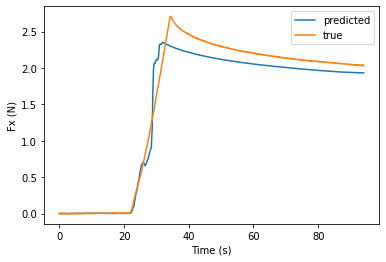

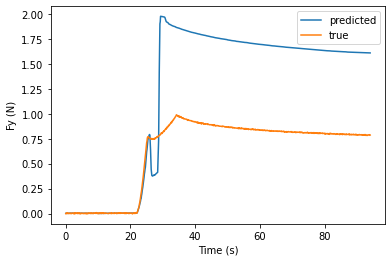

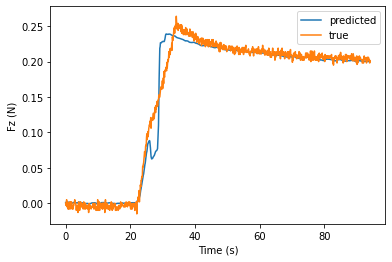

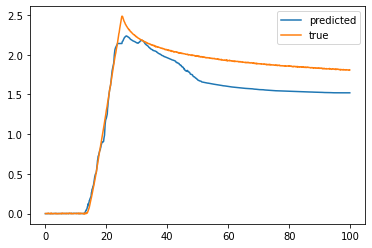

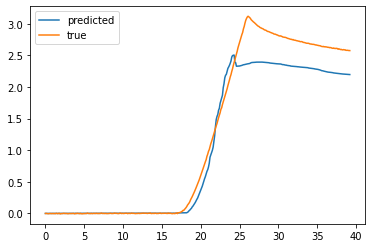

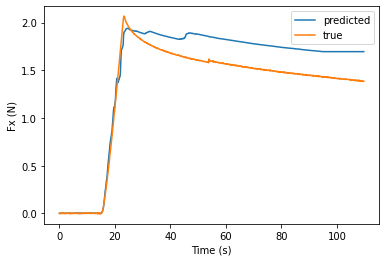

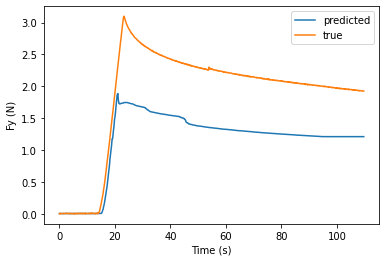

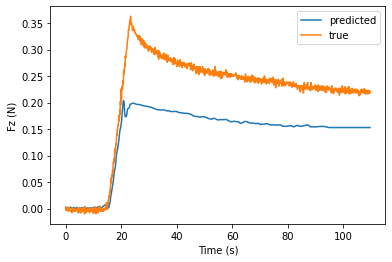

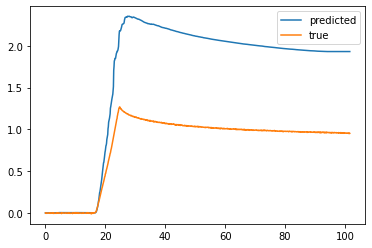

In [259]:
Peaks_pred = []
Peaks_true = []


datatrue = dff15_1011
Xtruetest = datatrue[features_train]
ytruetest = datatrue[features_target]

Xtruetestsc = scaler.transform(Xtruetest)
y_pred = pd.DataFrame(regressor.predict(Xtruetestsc), columns = features_target)

for i in features_target:
    Peaks_pred.append(y_pred[i].abs().max())
    Peaks_true.append(ytruetest[i].abs().max())

plt.plot(Xtruetest['Time'],y_pred['Fx'], label = 'predicted')
plt.plot(Xtruetest['Time'],ytruetest['Fx'],label = 'true')
plt.xlabel('Time (s)')
plt.ylabel('Fx (N)')
plt.legend(loc = 'best')
plt.show()

plt.plot(Xtruetest['Time'],y_pred['Fy'], label = 'predicted')
plt.plot(Xtruetest['Time'],ytruetest['Fy'],label = 'true')
plt.xlabel('Time (s)')
plt.ylabel('Fy (N)')
plt.legend(loc = 'best')
plt.show()

plt.plot(Xtruetest['Time'],y_pred['Fz'], label = 'predicted')
plt.plot(Xtruetest['Time'],ytruetest['Fz'],label = 'true')
plt.xlabel('Time (s)')
plt.ylabel('Fz (N)')
plt.legend(loc = 'best')
plt.show()


datatrue = dff15_912
Xtruetest = datatrue[features_train]
ytruetest = datatrue[features_target]

Xtruetestsc = scaler.transform(Xtruetest)
y_pred = pd.DataFrame(regressor.predict(Xtruetestsc), columns = features_target)

for i in features_target:
    Peaks_pred.append(y_pred[i].abs().max())
    Peaks_true.append(ytruetest[i].abs().max())

plt.plot(Xtruetest['Time'],y_pred['Fx'], label = 'predicted')
plt.plot(Xtruetest['Time'],ytruetest['Fx'],label = 'true')
plt.legend(loc = 'best')
plt.show()

datatrue = dff45_8
Xtruetest = datatrue[features_train]
ytruetest = datatrue[features_target]

Xtruetestsc = scaler.transform(Xtruetest)
y_pred = pd.DataFrame(regressor.predict(Xtruetestsc), columns = features_target)

for i in features_target:
    Peaks_pred.append(y_pred[i].abs().max())
    Peaks_true.append(ytruetest[i].abs().max())

plt.plot(Xtruetest['Time'],y_pred['Fy'], label = 'predicted')
plt.plot(Xtruetest['Time'],ytruetest['Fy'],label = 'true')
plt.legend(loc = 'best')
plt.show()

datatrue = dff45_710
Xtruetest = datatrue[features_train]
ytruetest = datatrue[features_target]

Xtruetestsc = scaler.transform(Xtruetest)
y_pred = pd.DataFrame(regressor.predict(Xtruetestsc), columns = features_target)

for i in features_target:
    Peaks_pred.append(y_pred[i].abs().max())
    Peaks_true.append(ytruetest[i].abs().max())

plt.plot(Xtruetest['Time'],y_pred['Fx'], label = 'predicted')
plt.plot(Xtruetest['Time'],ytruetest['Fx'],label = 'true')
plt.xlabel('Time (s)')
plt.ylabel('Fx (N)')
plt.legend(loc = 'best')
plt.show()

plt.plot(Xtruetest['Time'],y_pred['Fy'], label = 'predicted')
plt.plot(Xtruetest['Time'],ytruetest['Fy'],label = 'true')
plt.xlabel('Time (s)')
plt.ylabel('Fy (N)')
plt.legend(loc = 'best')
plt.show()

plt.plot(Xtruetest['Time'],y_pred['Fz'], label = 'predicted')
plt.plot(Xtruetest['Time'],ytruetest['Fz'],label = 'true')
plt.xlabel('Time (s)')
plt.ylabel('Fz (N)')
plt.legend(loc = 'best')
plt.show()

datatrue = dff45_1011
Xtruetest = datatrue[features_train]
ytruetest = datatrue[features_target]

Xtruetestsc = scaler.transform(Xtruetest)
y_pred = pd.DataFrame(regressor.predict(Xtruetestsc), columns = features_target)

for i in features_target:
    Peaks_pred.append(y_pred[i].abs().max())
    Peaks_true.append(ytruetest[i].abs().max())

plt.plot(Xtruetest['Time'],y_pred['Fx'], label = 'predicted')
plt.plot(Xtruetest['Time'],ytruetest['Fx'],label = 'true')
plt.legend(loc = 'best')
plt.show()

In [260]:
error = []
for i in range(len(Peaks_pred)):
    error.append(np.abs(Peaks_true[i]-Peaks_pred[i])/Peaks_true[i])
errorX = 1/5*(error[0]+error[6]+error[12]+error[18]+error[24])
errorY = 1/5*(error[1]+error[7]+error[13]+error[19]+error[25])
errorZ = 1/5*(error[2]+error[8]+error[14]+error[20]+error[26])
errorTx = 1/5*(error[3]+error[9]+error[15]+error[21]+error[27])
errorTy = 1/5*(error[4]+error[10]+error[16]+error[22]+error[28])
errorTz = 1/5*(error[5]+error[11]+error[17]+error[23]+error[29])

print(errorX, errorY, errorZ, errorTx, errorTy, errorTz)
print(1/3*(errorX+ errorY+ errorZ),1/3*(errorTx+ errorTy+ errorTz),np.mean(error))

0.29695229620742714 0.5066920470799112 0.27175323854675093 0.4854707451786996 0.20569437394487997 1.4385695692501483
0.3584658606113631 0.7099115627912426 0.5341887117013029


# Approach giving all the sequence to a NN

In [444]:
ALLdata = ([dffXALL,dffXNO,dffX9101112,dffX78,dffX910,dffX912,dffX1011,dffX1112,
            dff30ALL,dff30NO,dff30_910,dff30_78, dff30_78910, dff30_710,dff30_89,dff30_1112,
            dff60ALL,dff60NO,dff60_910,dff60_78, dff60_78910, dff60_710,dff60_89,dff60_1112])

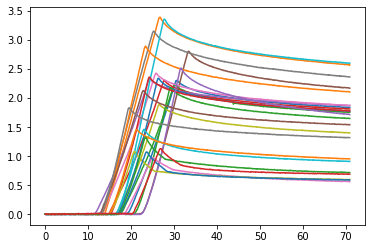

In [516]:
dtrsf = list()
for df in ALLdata:
    df = df[:710]
    plt.plot(df['Time'],df['Fx'])
    dtrsf.append(df)
plt.show()

dtrsf_test = list()

for df in [dff15_1011,dff15_912,dff45_710,dff45_1011]:
    df = df[:710]
    
    dtrsf_test.append(df)
plt.show()


In [576]:
X_train = list()
y_train = list()
X_test = list()
y_test = list()

for df in dtrsf:
    X_train.append(df[features_train])
    y_train.append(df[features_target])
    
for df in dtrsf_test:
    X_test.append(df[features_train])
    y_test.append(df[features_target])


In [577]:
Xtrtmp = []
Xtetmp = []
ytrtmp = []
ytetmp = []

for df in X_train:
    df = scaler.transform(df)
    df = np.array(df).reshape(1,710,10)
    Xtrtmp.append(df)
for df in X_test:
    df = scaler.transform(df)
    df = np.array(df).reshape(1,710,10)
    Xtetmp.append(df)
    
for df in y_train:
    df = np.array(df).reshape(1,710,6)
    ytrtmp.append(df)
for df in y_test:
    df = np.array(df).reshape(1,710,6)
    ytetmp.append(df)
    
X_train = np.array(Xtrtmp).reshape(24,710,10)
X_test = np.array(Xtetmp).reshape(4,710,10)
y_train = np.array(ytrtmp).reshape(24,710,6)
y_test = np.array(ytetmp).reshape(4,710,6)

In [578]:
X_train.shape

(24, 710, 10)

In [655]:
def new_model():
    model = models.Sequential()
    model.add(tf.keras.Input(shape=(710,10)))
    model.add(tf.keras.layers.Dense(50, activation='relu'))
    model.add(tf.keras.layers.Dense(100,activation = 'relu'))
    model.add(tf.keras.layers.Dense(50,activation = 'relu'))
    model.add(tf.keras.layers.Dense(25,activation = 'relu'))
    model.add(layers.Dense(6))
    return model

model = new_model()
print(model.summary())

def new_model2():
    model = models.Sequential()
    model.add(tf.keras.Input(shape=(710,10)))
    model.add(layers.Flatten())
    model.add(tf.keras.layers.Dense(14200, activation='relu'))
    model.add(tf.keras.layers.Dense(10750,activation = 'relu'))
    model.add(tf.keras.layers.Dense(7100,activation = 'relu'))
    model.add(tf.keras.layers.Dense(5600,activation = 'relu'))
    model.add(layers.Dense(4260))
    return model

model = new_model2()
model.summary()

Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_199 (Dense)            (None, 710, 50)           550       
_________________________________________________________________
dense_200 (Dense)            (None, 710, 100)          5100      
_________________________________________________________________
dense_201 (Dense)            (None, 710, 50)           5050      
_________________________________________________________________
dense_202 (Dense)            (None, 710, 25)           1275      
_________________________________________________________________
dense_203 (Dense)            (None, 710, 6)            156       
Total params: 12,131
Trainable params: 12,131
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_72"
_________________________________________________________________
Layer (type)              

In [647]:
model.compile(
    optimizer="adamax",
    loss='mse',
    metrics='mse'
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test,y_test),
    callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
    batch_size=4,
    epochs=500)

model.summary()

Epoch 1/500
6/6 [==============================] - 0s 48ms/step - loss: 11.7406 - mse: 11.7406 - val_loss: 25.5036 - val_mse: 25.5036
Epoch 2/500
6/6 [==============================] - 0s 14ms/step - loss: 11.2009 - mse: 11.2009 - val_loss: 25.7134 - val_mse: 25.7134
Epoch 3/500
6/6 [==============================] - 0s 12ms/step - loss: 10.5209 - mse: 10.5209 - val_loss: 23.2465 - val_mse: 23.2465
Epoch 4/500
6/6 [==============================] - 0s 11ms/step - loss: 10.2152 - mse: 10.2152 - val_loss: 23.3977 - val_mse: 23.3977
Epoch 5/500
6/6 [==============================] - 0s 12ms/step - loss: 9.8353 - mse: 9.8353 - val_loss: 26.0427 - val_mse: 26.0427
Epoch 6/500
6/6 [==============================] - 0s 13ms/step - loss: 9.9625 - mse: 9.9625 - val_loss: 23.8112 - val_mse: 23.8112
Epoch 7/500
6/6 [==============================] - 0s 15ms/step - loss: 9.1440 - mse: 9.1440 - val_loss: 23.9586 - val_mse: 23.9586
Epoch 8/500
6/6 [==============================] - 0s 13ms/step - lo

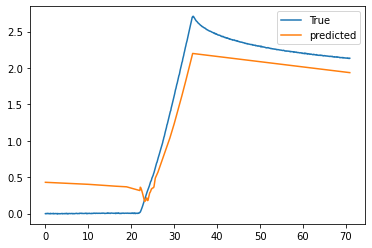

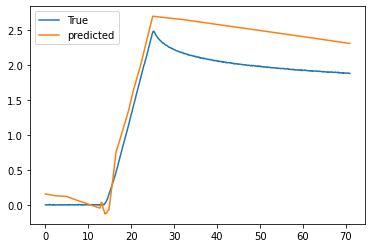

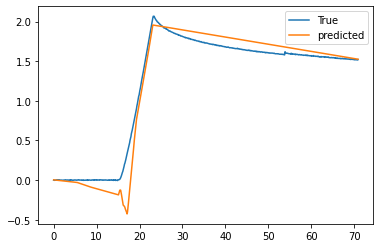

In [651]:
y1 = model.predict(X_test[0,:,:])
y2 = model.predict(X_test[1,:,:])
y3 = model.predict(X_test[2,:,:])




plt.plot(dff15_1011['Time'][:710],dff15_1011['Fx'][:710], label = 'True')
plt.plot(dff15_1011['Time'][:710],y1[:,0],label = 'predicted')
plt.legend(loc='best')
plt.show()

plt.plot(dff15_912['Time'][:710],dff15_912['Fx'][:710],label='True')
plt.plot(dff15_912['Time'][:710],y2[:,0],label = 'predicted')
plt.legend(loc='best')
plt.show()

plt.plot(dff45_710['Time'][:710],dff45_710['Fx'][:710],label='True')
plt.plot(dff45_710['Time'][:710],y3[:,0],label = 'predicted')
plt.legend(loc='best')
plt.show()

In [585]:
y1

array([[  0.39998034,  -0.16318934,   0.10409772,   2.9234889 ,
         -0.48981464,   0.47401887],
       [  0.401543  ,  -0.16450937,   0.10418867,   2.9223497 ,
         -0.47898954,   0.47319752],
       [  0.40310583,  -0.16582985,   0.10427939,   2.921212  ,
         -0.46816534,   0.47237712],
       ...,
       [  2.7012231 ,   0.42500728,   0.14017123,  10.304369  ,
        -79.46938   ,   5.3686337 ],
       [  2.700405  ,   0.4249634 ,   0.14007491,  10.308828  ,
        -79.44996   ,   5.36785   ],
       [  2.6995938 ,   0.4249186 ,   0.13997668,  10.313282  ,
        -79.43055   ,   5.367061  ]], dtype=float32)

# Ignore the following

## 11.12.Results Analysis


# Passive = No equivation 
### twice the same experiment for validation

In [9]:
dffp2

,Fx,Fy,Fz,Tx,Ty,Tz,else
0,-0.008,0.011,0.033,-0.280,0.039,-0.163,90689217.0
1,-0.007,0.011,0.036,-0.283,0.032,-0.154,90689217.0
2,-0.006,0.010,0.034,-0.294,0.030,-0.149,90689316.0
3,-0.007,0.010,0.033,-0.284,0.037,-0.158,90689316.0
4,-0.008,0.010,0.038,-0.292,0.036,-0.145,90689416.0
...,...,...,...,...,...,...,...
5251,-0.043,0.016,0.036,-0.474,-1.253,-0.178,90954222.0
5252,-0.043,0.014,0.039,-0.457,-1.284,-0.186,90954321.0
5253,-0.042,0.014,0.035,-0.435,-1.243,-0.166,90954321.0
5254,-0.042,0.013,0.032,-0.431,-1.249,-0.180,90954421.0


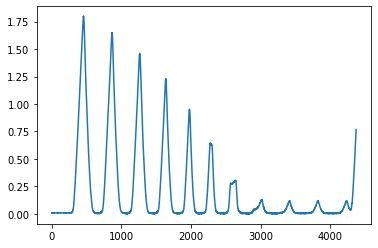

In [15]:
#df = pd.read_csv('Map_XY.csv', names = ['Fx','Fy','Fz','Tx','Ty','Tz','else'])
plt.plot(-1*dffp1['Fx'])

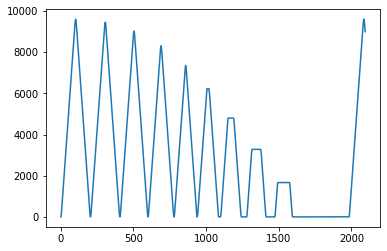

In [16]:
plt.plot(dfpp1['X'])

In [4]:
df2['Y'].max()
df['Fy'].max()
df[['Fy']].idxmax() #=1568
df.iloc[1568, :]


Fx          -0.056
Fy           0.272
Fz           0.024
Tx          -5.561
Ty          -1.418
Tz          -0.173
else    171719.000
Name: 1568, dtype: float64

0.272


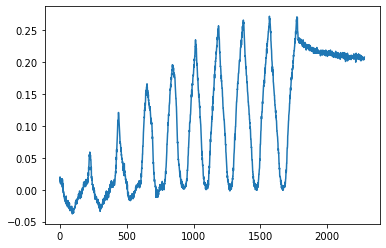

In [5]:
print(df['Fy'].max())
plt.plot(df['Fy'])
plt.show()

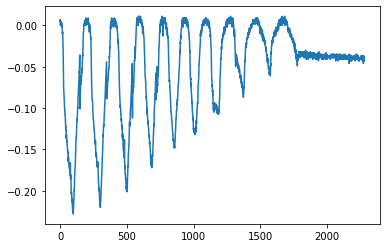

In [6]:
plt.plot(df['Fx'])

In [ ]:
plt.plot(df['Fy'])

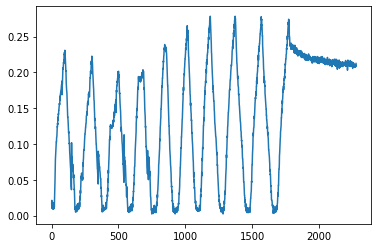

In [7]:
df['Force'] = (df['Fx']*df['Fx']+df['Fy']*df['Fy'])**0.5
plt.plot(df['Force'])

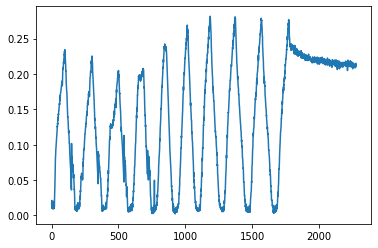

In [13]:
df['Force2'] = (df['Fx']*df['Fx']+df['Fy']*df['Fy']+df['Fz']*df['Fz'])**0.5
plt.plot(df['Force2'])

Text(0, 0.5, 'Newton')

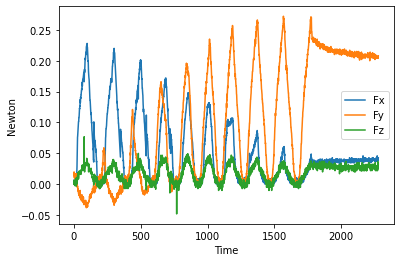

In [16]:

plt.plot(np.abs(df['Fx']), label = 'Fx')
plt.plot(df['Fy'], label = 'Fy')
plt.plot(df['Fz'], label = 'Fz')
plt.legend(loc ='best')
plt.xlabel('Time')
plt.ylabel('Newton')

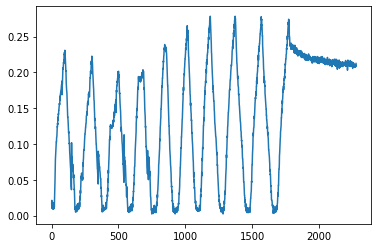

In [9]:
plt.plot(df['Force'])

In [62]:
# REAL TIME READING

from time import sleep
import serial
ser = serial.Serial('/dev/cu.usbmodem14201', 2000000) # Establish the connection on a specific port
counter = 32 # Below 32 everything in ASCII is gibberish
Times = []
PosX = []
PosY = []
PosZ = []
while True:
    intro = ser.readline()
    if intro[0:-2].decode("utf-8") == 'GO':
        a = ser.readline()
        Times.append(a[0:-2].decode("utf-8"))
        b = ser.readline()
        PosX.append(b[0:-2].decode("utf-8"))
        c = ser.readline()
        PosY.append(c[0:-2].decode("utf-8"))
        d = ser.readline()
        PosZ.append(d[0:-2].decode("utf-8"))
 # Convert the decimal number to ASCII then send it to the Arduino# Read the newest output from the Arduino
    sleep(.01) # Delay for one tenth of a second

         
         


KeyboardInterrupt: 

In [63]:
#DEALING WITH DATA, NOT IMPLEMENTED YET IN REAL TIME LOOP
for i in range(len(Times)):
    Times[i] = int(Times[i])
    PosX[i] = -int(PosX[i])
    PosY[i] = int(PosY[i])
    
data = pd.DataFrame([Times,PosX,PosY,PosZ])
data=data.T
data.columns = ['Time','PosX','PosY','PosZ']

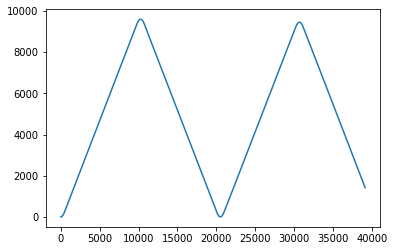

In [64]:
plt.plot(Times,PosX)

In [53]:
data.to_excel("01.12_Positions.xlsx") #SAVING TO EXTERNAL EXCEL FILE

In [41]:
help(sleep)

Help on built-in function sleep in module time:

sleep(...)
    sleep(seconds)
    
    Delay execution for a given number of seconds.  The argument may be
    a floating point number for subsecond precision.



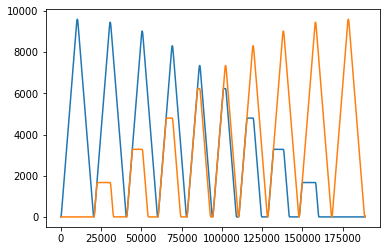

In [19]:
plt.plot(data['Time'], np.abs(data['PosX']))
plt.plot(data['Time'], data['PosY'])

In [76]:
data

,Time,PosX,PosY,PosZ
0,0,0,0,0
1,100,-12,0,0
2,200,-44,0,0
3,300,-95,0,0
4,400,-167,0,0
...,...,...,...,...
1879,188684,0,29,0
1880,188784,0,5,0
1881,188844,0,0,0
1882,188944,0,12,0


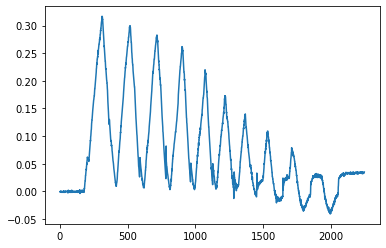

In [116]:
df = pd.read_excel("01.12.Forces.xlsx",names = ['Fx','Fy','Fz','Tx','Ty','Tz','else'])
plt.plot(df['Fx'])

In [117]:
#177

df = df.iloc[176:]
df = df.reset_index()

#1878 identified
df = df[:1878]

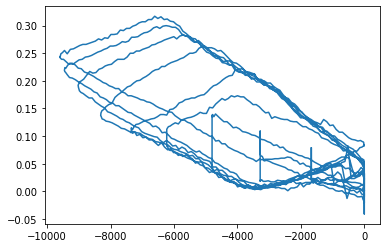

In [122]:
plt.plot(PosX[:1878], df['Fx'])

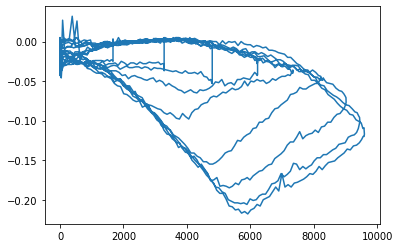

In [126]:
plt.plot((PosY[:1878]),df['Fy'])

In [ ]:
from time import sleep
import serial
ser = serial.Serial('/dev/cu.usbmodem14101', 2000000) # Establish the connection on a specific port
counter = 32 # Below 32 everything in ASCII is gibberish
Times = []
PosX = []
PosY = []
PosY = []
while True:
    try:
        ser_bytes = ser.readline()
        
        try:
            decoded_bytes = float(ser_bytes[0:len(ser_bytes)-2].decode("utf-8"))
            print(decoded_bytes)

In [ ]:
a = b'48243\r\n'
a[0:-2].decode("utf-8")

In [ ]:
a = b'00;0;0;\r\n'

In [ ]:
a[1:2].decode("utf-8")

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [21]:
model = keras.Sequential()
model.add(layers.Embedding(input_dim=10, output_dim=12))

#POSITIONS AND TORQUES
# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
#model.add(layers.GRU(256, return_sequences=True))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model.add(layers.SimpleRNN(128))

model.add(layers.Dense(12))

model.summary()

NameError: name 'keras' is not defined

In [ ]:
Times